# **DEEP LEARNING FOR COMPUTER SYSTEM**
# **Chapter 3: CNNs**


## **Images classification with MLP on CIFAR-10 dataset**

---

## 1. Load dataset

CIFAR-10 consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.

In [25]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [26]:
print("#train samples: ", len(y_train))
print("#test samples: ", len(y_test))

#train samples:  50000
#test samples:  10000


In [27]:
print("samples' shape: ", X_train[0].shape)

samples' shape:  (32, 32, 3)


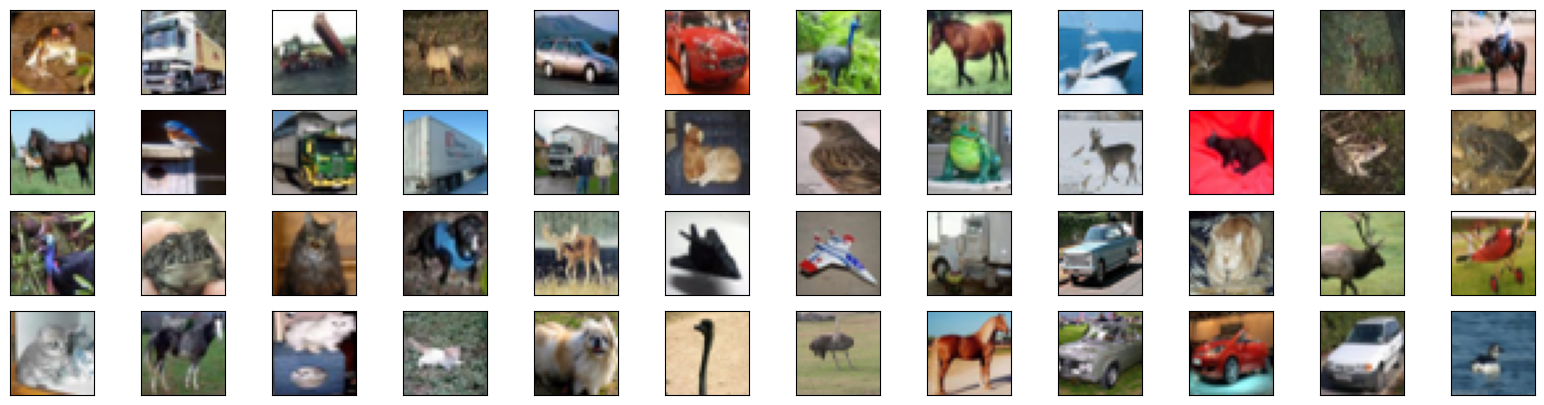

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

for i in range (48):
  ax = fig.add_subplot(4, 12, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i])

## 2. Preprocess

In [29]:
# Rescale input image: [0, 255] -> [0, 1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [30]:
# Encode categorical label using one-hot
from keras.utils import to_categorical

n_classes = len(np.unique(y_train))

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [31]:
# split train-val
(X_train, X_val) = X_train[5000:], X_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)

X_train shape:  (45000, 32, 32, 3)
X_val shape:  (5000, 32, 32, 3)


## 3. Define the model's architecture

Implement a smaller version of AlexNet:
INPUT => CONV_1 => POOL_1 => CONV_2 => POOL_2 => CONV_3 => POOL_3 => DO => FC => DO => FC (Softmax)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same',
                 activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)         

## 4. Compile & Train the Model

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
                               save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=100,
                 validation_data=(X_val, y_val), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.55746, saving model to model.weights.best.hdf5
1407/1407 - 11s - loss: 1.6053 - accuracy: 0.4228 - val_loss: 1.5575 - val_accuracy: 0.4390 - 11s/epoch - 8ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.55746 to 1.17871, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.2792 - accuracy: 0.5449 - val_loss: 1.1787 - val_accuracy: 0.5844 - 6s/epoch - 4ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 1.17871
1407/1407 - 6s - loss: 1.1466 - accuracy: 0.5916 - val_loss: 1.2731 - val_accuracy: 0.5402 - 6s/epoch - 4ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.17871 to 1.03151, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.0696 - accuracy: 0.6225 - val_loss: 1.0315 - val_accuracy: 0.6360 - 6s/epoch - 4ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 1.03151
1407/1407 - 6s - loss: 1.0123 - accuracy: 0.6450 - val_loss: 1.0747 - val_accuracy: 0.6252 - 6s/epoch - 4ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.03151 to 1.02139, saving model to model.weights.best.hdf5
1407/1407 - 7s - loss: 0.9742 - accuracy: 0.6595 - val_loss: 1.0214 - val_accuracy: 0.6452 - 7s/epoch - 5ms/step
Epoch 7/100


## 5. Evaluate

In [34]:
model.load_weights('model.weights.best.hdf5')

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: %.3f%%' % (score[1]*100))

Test accuracy: 70.050%


313/313 [==============================] - 1s 2ms/step


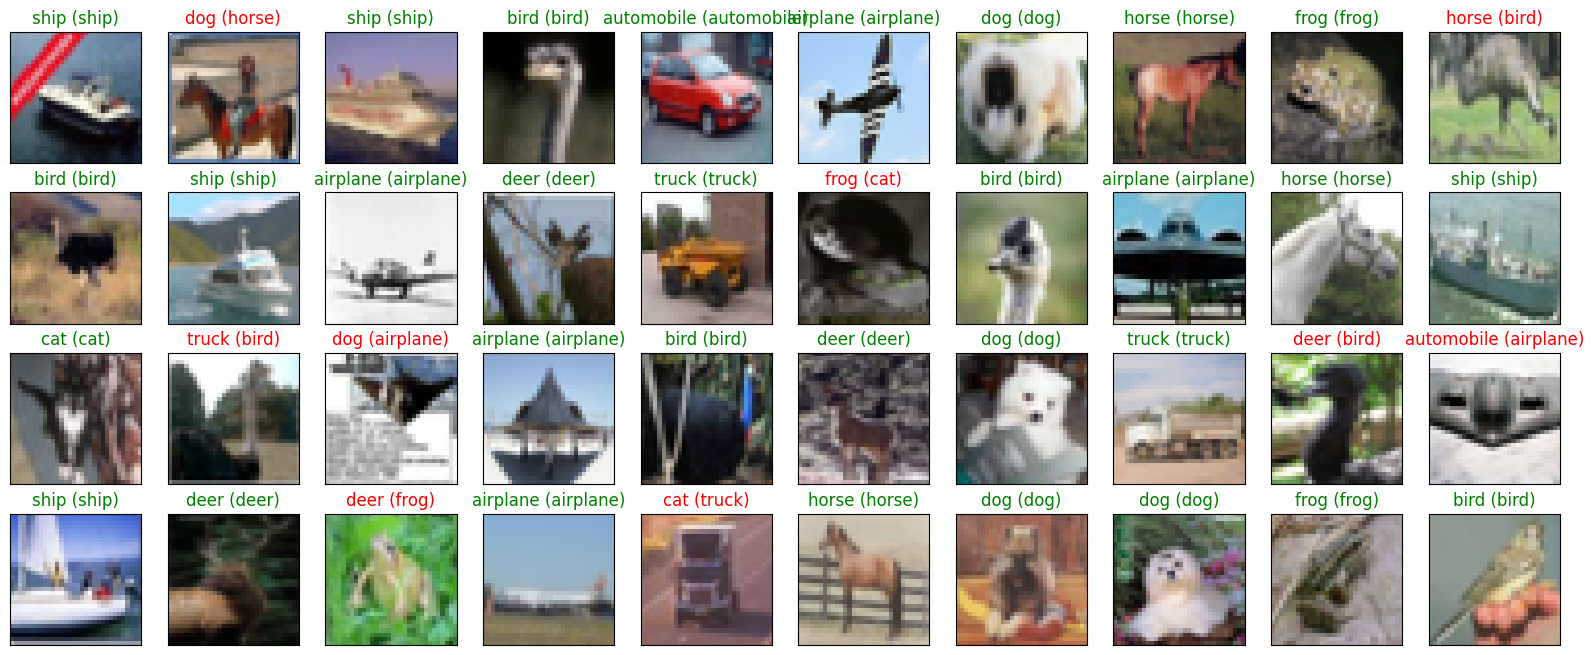

In [38]:
y_hat = model.predict(X_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(len(X_test), size=40, replace=False)):
  ax = fig.add_subplot(4, 10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  pred = labels[pred_idx]
  truth_idx = np.argmax(y_test[idx])
  truth = labels[truth_idx]
  color = 'green' if pred == truth else 'red'
  ax.set_title("{} ({})".format(pred, truth), color=color)